Now we test the sensitivity of the model to some input parameters

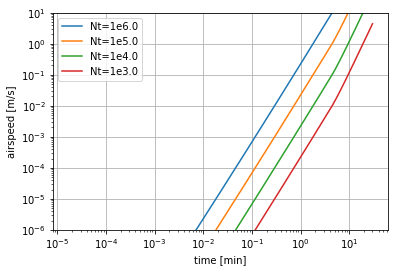

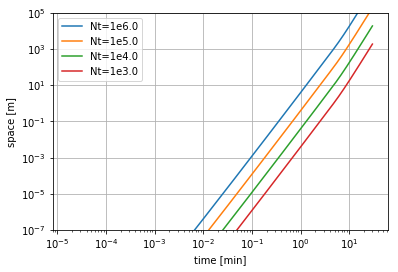

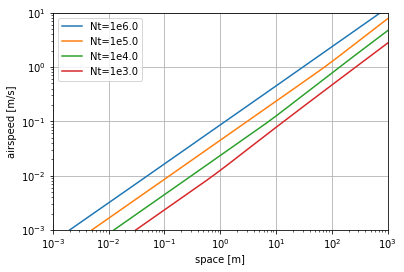

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

from heat_integrator import integrator_Tconst

p = 700e2
Tc = -15 # Temperature in degrees Celsius
RH = 110.0 # relative humidity [%]
Nt = [1e3,1e4,1e5,1e6] # Number of particles per cubic meter

q_hydro = 0. # mixing ratio of hydrometeors (contributing to air density)
v0 = 0.0 # initial (large scale) air parcel vertical velocity [m/s]
Tstop = 1800 # stop simulation time [seconds]
dt = 0.001 # time step of the Euler scheme [s]

f1 = plt.figure()
ax1 = plt.gca()
f2 = plt.figure()
ax2 = plt.gca()
f3 = plt.figure()
ax3 = plt.gca()

for N in Nt[::-1]:
    t, m, Temp, Tvp, ab, v, s = integrator_Tconst(p, Tc, RH, N)
    ax1.loglog(t[1:]/60., v, label='Nt=1e'+str(np.log10(N)))
    ax2.loglog(t[1:]/60., s, label='Nt=1e'+str(np.log10(N)))
    ax3.loglog(s, v, label='Nt=1e'+str(np.log10(N)))

ax1.set_xlabel('time [min]')
ax1.set_ylabel('airspeed [m/s]')
ax1.grid()
ax1.legend()
ax1.set_ylim([1e-6, 1e1])
f1.show()


ax2.set_xlabel('time [min]')
ax2.set_ylabel('space [m]')
ax2.grid()
ax2.legend()
ax2.set_ylim([1e-7, 1e5])
f2.show()

ax3.set_xlabel('space [m]')
ax3.set_ylabel('airspeed [m/s]')
ax3.grid()
ax3.legend()
ax3.set_xlim([1e-3, 1e3])
ax3.set_ylim([1e-3, 1e1])
f3.show()


/work/develop/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


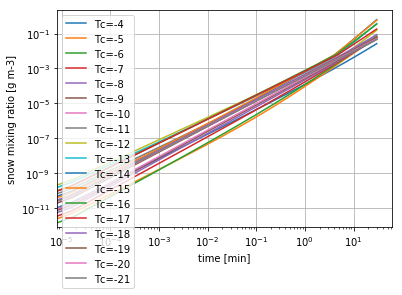

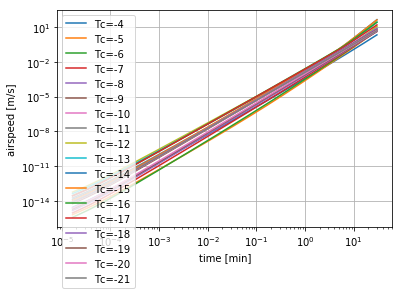

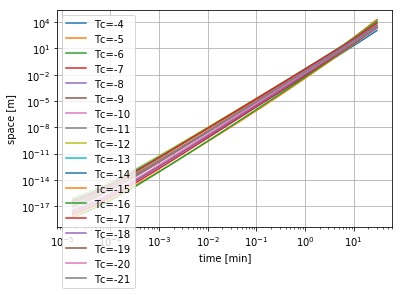

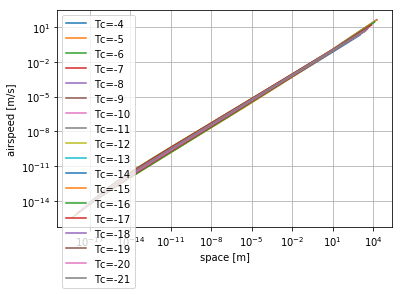

In [44]:
p = 700e2
Tc = [-4, -8, -12, -15, -18, -22] # Temperature in degrees Celsius
Tc = np.arange(-4,-22,-1) # Temperature in degrees Celsius
RH = 110.0 # relative humidity [%]
Nt = 1.0e4 # Number of particles per cubic meter

q_hydro = 0. # mixing ratio of hydrometeors (contributing to air density)
v0 = 0.0 # initial (large scale) air parcel vertical velocity [m/s]
Tstop = 1800 # stop simulation time [seconds]
dt = 0.001 # time step of the Euler scheme [s]

f0 = plt.figure()
ax0 = plt.gca()
f1 = plt.figure()
ax1 = plt.gca()
f2 = plt.figure()
ax2 = plt.gca()
f3 = plt.figure()
ax3 = plt.gca()


abv = []
for TT in Tc:
    t, m, Temp, Tvp, ab, v, s = integrator_Tconst(p, TT, RH, Nt, Tstart=0.)
    abv.append(ab)
    qs = m*Nt # [g m-3]
    ax0.loglog(t/60., qs, label='Tc='+str(TT))
    ax1.loglog(t[1:]/60., v, label='Tc='+str(TT))
    ax2.loglog(t[1:]/60., s, label='Tc='+str(TT))
    ax3.loglog(s, v, label='Tc='+str(TT))

ax0.set_xlabel('time [min]')
ax0.set_ylabel('snow mixing ratio [g m-3]')
ax0.grid()
ax0.legend()
#ax0.set_xlim([1e0, 1e1])
#ax0.set_ylim([1e-2, 1e0])
f0.show()

ax1.set_xlabel('time [min]')
ax1.set_ylabel('airspeed [m/s]')
ax1.grid()
ax1.legend()
#ax1.set_xlim([1e0, 1e1])
#ax1.set_ylim([1e-2, 1e0])
f1.show()


ax2.set_xlabel('time [min]')
ax2.set_ylabel('space [m]')
ax2.grid()
ax2.legend()
#ax2.set_ylim([1e-7, 1e5])
f2.show()

ax3.set_xlabel('space [m]')
ax3.set_ylabel('airspeed [m/s]')
ax3.grid()
ax3.legend()
#ax3.set_xlim([1e-3, 1e3])
#ax3.set_ylim([1e-3, 1e1])
f3.show()

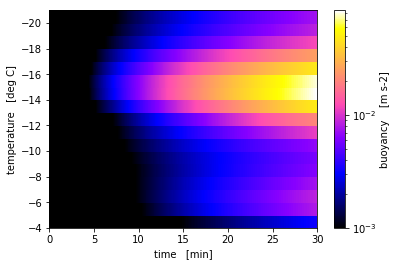

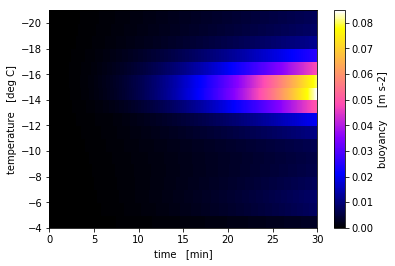

In [45]:
import matplotlib.colors as colors
aba = np.stack(abv)
f = plt.figure()
ax = plt.gca()
mesh = ax.pcolormesh(t/60, Tc, aba, cmap='gnuplot2', norm=colors.LogNorm(vmin=1e-3, vmax=np.nanmax(aba)))
ax.set_xlabel('time   [min]')
ax.set_ylabel('temperature   [deg C]')
ax.invert_yaxis()
plt.colorbar(mesh, ax=ax, label='buoyancy    [m s-2]')
f.show()

f = plt.figure()
ax = plt.gca()
mesh = ax.pcolormesh(t/60, Tc, aba, cmap='gnuplot2')
ax.set_xlabel('time   [min]')
ax.set_ylabel('temperature   [deg C]')
ax.invert_yaxis()
plt.colorbar(mesh, ax=ax, label='buoyancy    [m s-2]')
f.show()

3.673825432368364e-13

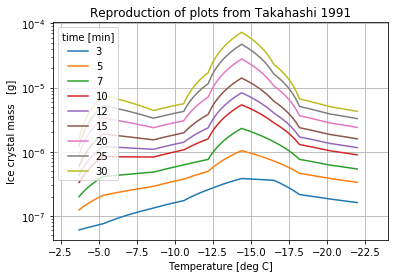

In [43]:
run Takahashi1991.py